# Laboratory 02 - Introduction to Digital Data Acquisition, FFT,  and Spectrum Analysis 1

## MAE 3120, Spring 2020

### Joe Marx & Christian Trummer

## Grading Rubric

Procedures, Results, Plots, Tables - 60%

Discussion Questions - 25%

Neatness - 15%

## Abstract

In this experiment, several methods of data analysis were explored and tested in order to further understand how to these methods can improve data acquisition and analyzation. A waveform generator was used to create different signals while Python3 code was implemented to retrieve and then analyze the signal data. Once acquired, the data spectra was found; in order to minimize the leakage and energy loss, the Hanning Window method was applied to the data to smooth the signal and improve its continuity with a weighted cosine function. Conclusions about data acquisition methods were made as well; the effects of changing sampling frequency and/or the resolution were explored. Increasing sampling frequency will take data at a higher rate, however, this increases frequency resolution and can lead to leakage when plotting the signal's spectra. Increasing the sampling period will increase the total amount of data points taken; if the period is an integer multiple of the frequency, changing the period can decrease leakage as well. Using Hanning windowing and following the nyquist criterion, optimization of signal detection can be optimized in every stage to improve accuracy and minimze leakage: acquisition, analysis and application.


## Introduction and Background

Prior to the 1980s, the oscilloscope and strip-chart recorder represented the most common methods for measurement of time-varying signals. With time PC-based digital data acquisition became standard in most laboratories. By combining high-speed data acquisition cards with graphical software, it is now possible to design complex data acquisition systems with real-time data analysis and plotting features, with minimal programming. The data acquisition hardware converts analog inputs into the digital domain at the specified sampling rate, and the software manipulates and displays the desired output. 

In this lab we use Python and the NI-DAQmx API for digital data acquisition. Using the ***DAQ*** Jupyter Notebook developed for this class, instructions are issued to the data acquisition hardware, either inside the PC or external to the PC (the hardware we use in our lab is connected through the USB port). The ***DAQ*** can be configured to record data to files, change sampling parameters, and display a live output of your sampled signal. 

The goal of this tutorial is to provide you with your first experience using the ***DAQ*** notebook to perform data acquisition. You will use the ***DAQ*** to take samples and plot voltage data and to illustrate some limitations of digital data acquisition systems. 

To help verify that you have configured the ***DAQ*** properly before performing trials, you will learn how to use ***NI MAX*** (a software provided by National Instruments). 

Ultimately, you will experiment with digital data acquisition and some of its shortcomings. For your report you are expected to save all the data you will acquire in the lab to files and plot them in Python. 

___

In spectral analysis the goal is to determine the frequency content of a signal. Aliasing can be a serious problem with digital data acquisition if the experimenter is not careful. Significant measurement errors called ***aliasing*** errors are possible if the waveform is not sampled at high enough frequency. To avoid aliasing, the ***sampling rate*** must be at least twice the maximum frequency of the measured signal. This restriction is called the ***Nyquist criterion***. Signal aliasing occurs when waveforms are sampled at frequencies below the Nyquist frequency. Aliased signals appear to have frequencies (and possibly even waveform *shapes*) that differ from those of the actual signal. For adequate resolution of the waveform shape, data should be sampled at a much higher frequency – typically at least five times the Nyquist frequency, if possible.

Digital PC-based data acquisition will not totally replace oscilloscopes, at least not in the near future. The reason is sampling frequency. The maximum sampling frequency of modern PC A/D systems is typically less than a MHz (megahertz). By comparison, a good digital oscilloscope may sample as high as several GHz (gigahertz)!

The fast Fourier transform (FFT) is a computationally efficient form of the more general discrete Fourier transform (DFT), which is itself a discretized version of the even more general Fourier transform (FT). Like Fourier series analysis, FFT analysis enables us to calculate the frequency content of a signal. Fourier series analysis is useful for continuous, periodic, analog signals of known fundamental frequency. FFT analysis, on the other hand, is useful for discretely sampled (digital) data, and can be applied even if the signal is not periodic. With FFT analysis, the fundamental frequency of a periodic signal does not have to be known a priori. NumPy has built-in FFT features, which are utilized in this lab. 

For $N$ sampled data points at sampling frequency $f_s$, the most useful output of an FFT calculation is the frequency spectrum or amplitude spectrum, which is a plot of modified FFT amplitude versus frequency. The frequency spectrum shows the relative importance or contribution of discrete frequencies, which range from zero to $f_s\,/\,2$. (The factor of two is a direct result of the Nyquist criterion.) The number of discrete frequencies on the frequency spectrum plot is $N\,/\,2 + 1$. This is half of the number of discretely sampled data points in the original signal, plus one extra since we typically plot both extreme values – from zero Hz (DC component) to the folding frequency $f_\textit{folding}$. 

Here are some useful definitions for FFTs:

- $N$ is the ***total number of discrete data points*** taken. $N$ is an input parameter, chosen by the user.<br><p></p>

- $f_s$ is the ***sampling frequency***, in Hz. $f_s$ is an input parameter, chosen by the user. *All other properties of the FFT, including sampling time, maximum frequency, frequency resolution, etc., are determined solely from these two inputs, $N$ and $f_s$.*<br><p></p>

- $T$ is the ***total sampling time***, and is calculated as $T = N\,/\,f_s$. To increase the sampling time, we must either *increase* the number of data points, or *decrease* the sampling frequency (or both).<br><p></p>

- $f_\textit{folding}$ is the ***folding frequency***, also called $f_\textit{max}$, the ***maximum frequency***. $f_\textit{folding} = f_s\,/\,2$. $f_\textit{folding}$ is the maximum frequency plotted on the frequency spectrum plot, since $f_\textit{folding}$ is the maximum frequency at which reliable information about the signal can be calculated, due to the Nyquist criterion. The only way to increase $f_\textit{folding}$ is to increase the sampling frequency.<br><p></p>

- $\Delta f$ is the ***frequency resolution*** or ***frequency increment*** of the frequency spectrum. $\Delta f = 1\,/\,T = f_s\,/\,N$. On the frequency spectrum plot, amplitudes of the FFT are plotted at $N\,/\,2 + 1$ discrete frequencies, each separated by $\Delta f$. In other words, the discrete values of $f$ are $0$, $\Delta f$, $2 \Delta f$, $3 \Delta f$, ... , $[(N\,/\,2\,– 1)] \Delta f$. (The amplitude at exactly $f_\textit{folding}$, i.e., at $(N\,/\,2) \Delta f$, is also plotted; this results in a total of $(N\,/\,2) + 1$ discrete frequencies, counting both $f = 0$ and $f = f_\textit{folding}$). The *only* way to increase the frequency resolution is to increase sampling time.<br><p></p>

Here is a summary of some useful techniques and rules to remember when calculating FFTs:

- To get better frequency resolution for a fixed sampling frequency, increase the number of data points.<br><p></p>

- To get better frequency resolution for a fixed number of data points, decrease the sampling frequency. (But be careful here not to let $f_s$ fall below the Nyquist criterion limit).<br><p></p>

- To get frequency component information at higher frequencies, increase the sampling frequency.<br><p></p>

- To reduce ***leakage*** in the frequency spectrum, do one or more of the following:<br><p></p>

  - Increase the number of sampled data points $N$ (at the cost of more computer time).<br><p></p>
  
  - Decrease the sampling frequency $f_s$ (but do not sample at such a low frequency that the Nyquist criterion is violated).<br><p></p>
  
  - Multiply the time signal by a ***windowing*** function prior to taking the FFT (at the cost of throwing away a significant portion of the signal, in particular data points near the start and finish of the time trace).

## Precautions

Due to the nature of the A/D conversion process, it is necessary to take several precautions to ensure that the analog signal is adequately represented once it is converted to the digital domain. An experimenter who is not careful can encounter problems such as poor resolution, clipping, and aliasing. The most important factors when sampling a signal are dynamic range, input range, and sampling rate.

- The dynamic range of the data acquisition card is the number of discernible levels or bins that the A/D converter can assume. The number of bits outputted by the A/D converter determines the dynamic range; namely, there are $2^N$ available levels or bins for an N-bit A/D converter. For example, a 12-bit A/D converter has a dynamic range of $2^{12}$, or $4096$. It is important to utilize as much of the available dynamic range as possible.<br><p></p>

- Another potential problem with digital data acquisition is clipping. If a voltage lies beyond the input range of the A/D converter, the signal is clipped. 

## Equipment

- Computer<br><p></p>

- Software: NI MAX, Jupyter<br><p></p>

- Hardware: National Instrument CompactDAQ cDAQ-9174, NI-9201 C Series Voltage Input Module <br><p></p>

- Function/waveform generator, along with appropriate cables<br><p></p>

- Oscilloscope

## Procedure

### Part I - Introduction to **NI MAX** and Hardware Configuration

In this section, you will use the ***NI MAX*** software to verify that you have properly setup your hardware. The CompactDAQ Data Acquisition System (cDAQ) reads from four input modules. In this lab, we will be using the *NI 9201* module. 

1. Verify that ***NI MAX*** and appropriate drivers are installed on your computer (see installation instructions if using personal computer). <br><p></p>

- Ensure the *NI 9201* card is in the furthest left spot on the cDAQ. <br><p></p>

- Connect the cDAQ to the computer using the USB cable and plug it in to a power source.<br><p></p>

- ***NI MAX*** may automatically launch after the cDAQ is connected and powered. Open ***NI MAX*** manually if this does not occur. <br><p></p>

- Select the *Devices and Interfaces* tab under *My System* in ***NI MAX***. There, select the device with a name similar to `NI cDAQ-9174 "cDAQ1"`. <br><p></p>

- Select the first module (`1: NI 9201 "cDAQ1Mod1"`). If the *NI 9201* card is not the first module, change its location and then click the "Refresh" button at the top. Take note of the *Name* displayed on the right side of the screen (`cDAQ1Mod1`) as you may need this later when configuring the ***DAQ*** program. <br><p></p>

- Select *Test Panels* from the top right menu. <br><p></p>

- Set the Rate to *1000 Hz*, and the Mode to *Continuous*. <br><p></p>

- Click *Start* to observe a live graph of the analog input. <br><p></p>

- A low voltage signal should be observed around 0V. This is noise being measured by the device as no voltage source is connected to it. As long as there are no errors here, you can proceed with your data acquisition in the next part of the procedure.<br><p></p>

- Should you wish to view a live output of the signal from the module at any point, revisit the *Test Panels* screen in ***NI MAX***.

### Part II - Digital Data Acquisition

In this section, you will use the ***DAQ*** Jupyter Notebook to test limitations of digital data acquisition systems. 

1. Open the ***DAQ*** Jupyter Notebook located in the *Labs* folder. Read below for information on how to use the `acquire` function. <br><p></p>

- In the second cell, you will notice the `acquire` function. This function will be used throughout the course to acquire data using Python. <br><p></p>

- The docstring provides a simplified explanation of how to use certain variables in the function. A more detailed explanation is provided below. <br><p></p>

- `acquire` requires two variables to be passed, `N` and `fs`; all other arguments are optional and can be used as needed. To use an optional argument, include the arguments name and the value you wish to assign to it (e.g. `max_channel=7`). <br><p></p>

- Arguments

 - `N (int)`: Number of samples to measure. <br><p></p>

 - `fs (float)`: Sampling frequency in Hz (Hertz, cycles per second). <br><p></p>

 - `max_channel (int)`: Maximum voltage channel to read from. If you look at the side of the *NI 9201* cards, you will notice that it lists channels from `ai0` to `ai7`. Setting this to `0` will result in data only being read from the `ai0` channel. Setting this to `7` will result in data being read from channels `ai0`-`ai7`. The default value is `0`. <br><p></p>

 - `file_out (String)`: Output directory and file name of initial output. This is the name and location of the output file. The default value is `''`, which results in no file output. An example of a valid file name would be `'C:\\Users\\Josh\\Downloads\\Lab2_0.csv'`. All file names **must** end in an underscore followed by a one or two digit number, then the CSV file extension (e.g. `_0.csv`). Do not forget that Python requires the double backslash (`\\`) in Strings.<br><p></p>

 - `output (String)`: Type of output. `'X'` is the default value and outputs no file. `'N'` creates a new file every trial. `'R'` replaces data from the last trial. `'A'` appends new data to the last trial's file. If no file exists initially, a file will be created so long as `'X'` is not selected. <br><p></p>

 - `time_sep (float)`: Time increment to update live plot in seconds. By default, the live plot updates every `1` second. It cannot update at any faster rate. This value does not need to be changed unless you are acquiring data for a long period of time and/or at a high sampling rate (> 15 seconds). If you are acquiring data for more than 1 minute, this value should be changed to a number around `30`. <br><p></p>

 - `zero_bound (bool)`: Determines whether live graph is bounded to 0. By default, this value is `True`, meaning that you will still be able to see the data recorded at 0 seconds while the live plot is updating. If you want to see the data from only the current `time_sep` value, set this to `False`. <br><p></p>

 - `daq_name (String)`: Name of DAQ card/system. By default, this is `'cDAQ1Mod1'`. This is the String from *Part I - Step 6*. While you should not need to change this value, if the card you are using is in a different slot, the name may be different. <br><p></p>
 
 - `mod_type (String)`: Type of DAQ card. By default, this is `'ai'` for an analog input. `'tc'` is used for a thermocouple. `'pr'` is used for an analog input with small differential voltage. <br><p></p>
 
 - `plt_sp_fft (bool)`: Plots frequency spectrum of data using Fast Fourier Transform (FFT). The default value is `False`. This argument only works with one channel input. <br><p></p>
 
 - `han_window (bool)`: Applies a Hanning window to the plot output. This does not change the saved data. The default value is `False`. <br><p></p>

- Example Usage

 - 100 samples of data, sampling rate of 1000 Hz, no file output: `acquire(100, 1000)`<br><p></p>

 - 100 samples of data, sampling rate of 1000 Hz, create a new file after every trial, file location location is 'C:\Users\Josh\Downloads': `acquire(100, 1000, file_out='C:\\Users\\Josh\\Downloads\\Lab2_0.csv', output='N')`<br><p></p>

 - 300e3 samples of data, sampling rate of 1000 Hz, no file output, refresh the plot every 30 seconds, view only the last 30 seconds of data: `acquire(300e3, 100, time_sep=30, zero_bound=False)`
 
### Part III - Data Acquisition Board Accuracy

1. Before using the *NI 9201* module, you need to test it to verify is behaving within its specifications (given in Appendix B). Discuss with your lab partners what you need to measure and how you would proceed. Perform these measurements and report their results as well as how you performed them in your report.<br><p></p>

- While performing trials, make sure you save the measured data and can access the data after the lab section. You will need it to generate plots in your lab report. <br><p></p>

- Your lab report must include a table with the following columns: 

  - Run number / filename<br><p></p>
  
  - Lab section (which step in the procedures)<br><p></p>
  
  - Signal<br><p></p>
    
    - Frequency (Hz) and Waveform Type *(e.g. Sine 20)*<br><p></p>
  
    - Amplitude (Vpp)<br><p></p>
  
    - DC Offset (VDC)<br><p></p>
  
  - Acquisition<br><p></p>
  
    - Sampling Rate (Hz)<br><p></p>
  
    - Number of Samples<br><p></p>
    
  - Comments *(e.g. Curve looks continuous)*


### Part IV - Discrete Data Acquisition

Here you will demonstrate the digital data acquisition system acquire data at discrete times. We transform the original continuous (analog) signal into a discrete (digital) signal. There is a significant amount of theory regarding digital data acquisition and signal processing that will be introduced in the coming lectures and labs. 

1. Using a BNC T-Adapter, connect the waveform/function generator to the first channel of the oscilloscope and a pair of output wires. <br><p></p>

- Connect the wire output to the *NI 9201* module. The positive output should be connected to `AI0` and the negative to `COM`. <br><p></p>

- Power on the oscilloscope. Configure the function generator to produce a 20 Hz sine wave, 0V DC Offset, 1V peak-to-peak amplitude. <br><p></p>

- Using the `acquire` function in the third cell of the ***DAQ*** notebook, set the sampling rate to 100,000 Hz and the number of samples to 10,000. You are acquiring 100 ms of data which corresponds to two waveforms and about 50,000 points per waveform. <br><p></p>

- Verify the signal using the oscilloscope. Run the `acquire` function with no file output to test that the function is working properly. <br><p></p>

  - To have a 'live' output in Jupyter, use this line of code: `acquire(120 * fs, fs, time_sep=1, zero_bound=False)`. When you are done observing the output, click the *Stop* button in Jupyter. <br><p></p>

- Once you are comfortable with the acquisition, set a file output and save one run of the data for your report. <br><p></p>

- Decrease the data acquisition rate until the signal displayed on the graph starts to look “pixelated”. To save the same duration of data, additionally adjust the number of samples so that you acquire 100 ms (two waveforms). Use the following frequencies and save each case to a file for use in your report: 

  - 10,000 Hz<br><p></p>
  
  - 1,000 Hz<br><p></p>
  
  - 100 Hz<br><p></p>
  
- In your report discuss the appearance of your recorded waveforms.


### Part V - Leakage effect

1. Remember to be organized when acquiring data. Generate a table that includes all the runs and associated parameters you will acquire in this lab and report this matrix of experiments in your lab report.<br><p></p> 

- Using the `acquire` function, set `plt_sp_fft` to `True`. This will display the frequency plot when a FFT is applied to your data. Additionally, set the `time_sep` to `120` to prevent the graph from updating.<br><p></p> 

- Set a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude on the waveform generator. Keep monitoring your signal on the oscilloscope. For each of the steps below, save the time history signal to file. Use Python to recreate each spectrum. In your report you are expected to report both the time series and frequency spectra. <br><p></p>

- Set $f_s = 200\text{ Hz}$, $N = 256$.<br><p></p>

- To try to reduce the leakage, try first to increase the sampling rate. Set $f_s = 1000\text{ Hz}$, $N = 256$.<br><p></p>

- Try the following settings. Set $f_s = 25\text{ Hz}$, $N = 256$.<br><p></p>

- Try the following settings. Set $f_s = 25\text{ Hz}$, $N = 512$. What can you conclude about the spectral accuracy of our system?<br><p></p>

- Finally, try the following settings. Set $f_s = 25.6\text{ Hz}$, $N = 512$. This corresponds to a “perfect FFT”, can you think why?

### Part VI - Windowing of FFT

Keep the same parameters as above for the signal generator. Keep monitoring your signal on the oscilloscope.<br><p></p>

1. Using the `acquire` function, set `han_window` to `True`. This will apply a Hanning windowing function. It has the following formula and appearance:<br><p></p>

$$u_\textit{Hanning}(t) = \frac{1}{2} \left(1 - cos \frac{2 \pi t}{T}\right)$$

<img src="img/Hanning.png" width=480>

2. Redo the measurements from *Part V* and save data for each condition. Do you observe any improvement?<br><p></p>

- Add a 1V DC Offset and redo the measurements. What do you observe?<br><p></p>

- By now you should know how to optimize the spectral response of a system. Now create triangular waves of similar frequency and select the proper sampling rate, period, and windowing. How many harmonics do you observe? 

# Results

## Figures

<center><img src="Img_out/Lab2_0.png" width="700"> figure 1. Signal of a 20 Hz sine wave, 0V DC Offset, and 1V peak-to-peak amplitude with $f_s = 100,000\,Hz,\,N=10,000$</center><br><p></p>

<center><img src="Img_out/Lab2_1.png" width="700">figure 2. Signal of a 20 Hz sine wave, 0V DC Offset, and 1V peak-to-peak amplitude with $f_s = 10,000\,Hz,\,N=10,000$</center><br><p></p>

<center><img src="Img_out/Lab2_2.png" width="700">figure 3. Signal of a 20 Hz sine wave, 0V DC Offset, and 1V peak-to-peak amplitude with $f_s = 1,000\,Hz,\,N=10,000$</center><br><p></p>

<center><img src="Img_out/Lab2_3.png" width="700">figure 4. Signal of a 20 Hz sine wave, 0V DC Offset, and 1V peak-to-peak amplitude with $f_s = 100\,Hz,\,N=10,000$</center><br><p></p>

<center><img src="Img_out/Lab2_4.png" width="700">figure 5a. Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_4fft.png" width="700">figure 5b. Frequency spectrum of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_5.png" width="700">figure 6a. Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_5fft.png" width="700">figure 6b. Frequency spectrum of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_6.png" width="700">figure 7a. Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_6fft.png" width="700">figure 7b. Frequency spectrum of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_7.png" width="700">figure 8a. Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_7fft.png" width="700">figure 8b. Frequency spectrum of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_8.png" width="700">figure 9a. Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_8fft.png" width="700">figure 9b. Frequency spectrum of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_9window.png" width="700">figure 10a. Hanning Window Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_9windowfft.png" width="700">figure 10b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_10window.png" width="700">figure 11a. Hanning Window Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_10windowfft.png" width="700">figure 11b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_11window.png" width="700">figure 12a. Hanning Window Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_11windowfft.png" width="700">figure 12b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_12window.png" width="700">figure 13a. Hanning Window Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_12windowfft.png" width="700">figure 13b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_13window.png" width="700">figure 14a. Hanning Window Signal of a 10 Hz sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_13windowfft.png" width="700">figure 14b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_14window.png" width="700">figure 15a. Hanning Window Signal of a 10 Hz sine wave, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_14windowfft.png" width="700">figure 15b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 200\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_15window.png" width="700">figure 16a. Hanning Window Signal of a 10 Hz sine wave, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_15windowfft.png" width="700">figure 16b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 1000\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_16window.png" width="700">figure 17a. Hanning Window Signal of a 10 Hz sine wave, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_16windowfft.png" width="700">figure 17b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_17window.png" width="700">figure 18a. Hanning Window Signal of a 10 Hz sine wave, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_17windowfft.png" width="700">figure 18b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_18window.png" width="700">figure 19a. Hanning Window Signal of a 10 Hz sine wave, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_18windowfft.png" width="700">figure 19b. Frequency spectrum of a 10 Hz sine wave after Hanning Windowing, 1V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_19.png" width="700">figure 20a. Signal of a 10 Hz triangle sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_19fft.png" width="700">figure 20b. Frequency spectrum of a 10 Hz triangle sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=256$</center><br><p></p>

<center><img src="Img_out/Lab2_19window.png" width="700">figure 20c. Hanning Window Signal of a 10 Hz triangle sine wave, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

<center><img src="Img_out/Lab2_19windowfft.png" width="700">figure 20d. Frequency spectrum of a 10 Hz triangle sine wave after Hanning Windowing, 0V DC Offset, and 2V peak-to-peak amplitude with $f_s = 25.6\,Hz,\,N=512$</center><br><p></p>

## Tables

Table 1
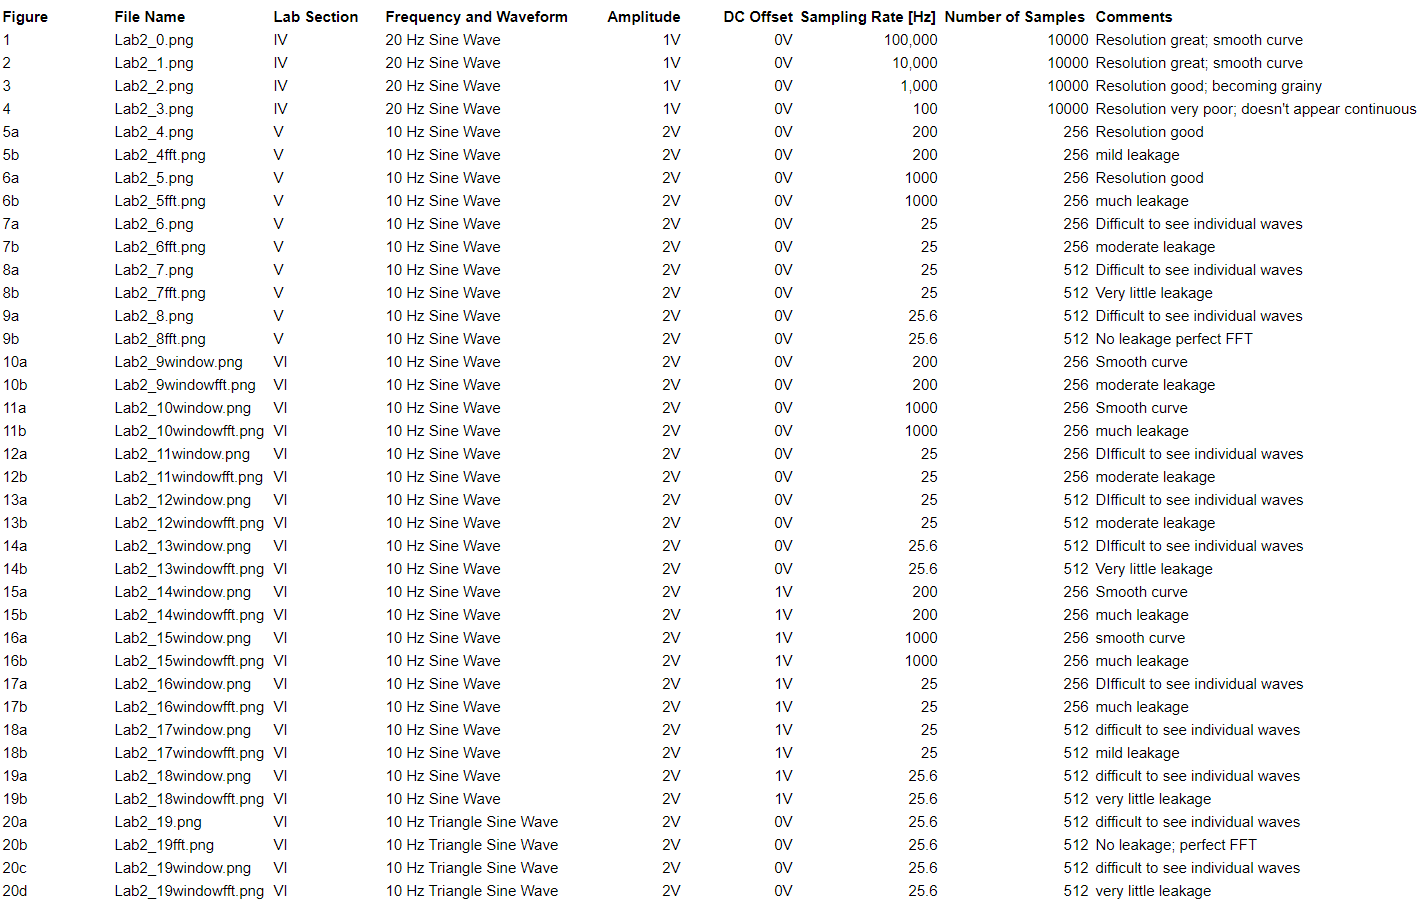

# Discussion Questions
Note: all <font color="red">red text</font> represents information written by Joe and Christian

**1. What is the resistance of your coaxial cable? Does it depend on length of the cable? Explain why coaxial cables are often used in communication between instruments and in telecommunication.**<br><p></p>
<font color='red'>
The resistance of the coaxial cable used was 50 $\Omega$. The resistance does depend on the length of the cable $R = \frac{\rho L}{A}$. Coaxial cables are commonly used between instruments and in telecommunications because they have low resistance due to the coaxial layering that includes multiple insulating layers. <br><p></p></font>

**2. Explain why you need to select the output of your waveform generator to infinite impedance. What would happen if you had it selected for 50 Ω impedance? Explain this with a simple circuit.**<br><p></p>
<font color='red'>
The waveform generator must be set to infinite impedance in order to produce the largest signal output to be interpreted. If the impedence was 50 Ω, the output signal would be too small to interpret. Consider a simple circuit with one resistor and a voltage source. In order to ensure the waveform generator receives the maximum possible voltage signal, it much have a very high resistance compared to that of the wires. When in series, current through resistors is the same. However, if one resistor is extremely large, the voltage drop across it will be very large and the voltage loss due to the wires will be negligible. Setting the waveform generator's impedance to infinity  𝑅𝑊𝐺>>𝑅𝑊𝑖𝑟𝑒 , this means that  𝑉𝑊𝐺≈𝑉𝑆𝑖𝑔𝑛𝑎𝑙  and  𝑉𝑊𝑖𝑟𝑒𝑠≈0 . In the photo below, R1 will have a voltage drop of almost the entire source voltage of 5V while the second resistor (representing the wires) will have a voltage drop near 0 V.</font>

<img src="pic.png" width="400">

**3. *Part V*, for each of the test cases, calculate the frequency resolution and the energy contained at the signal frequency (10 Hz). Comment on:**
<br><p></p>
 **A. The resolution of the sine wave.**
 
<font color='red'>
The resolution of the sine waves in figures 7a, 8a, and 9a is very poor - likely due to the fact that the sampling frequencies and number of data points yield a large sampling period relative to the number of waveforms. This makes a pattern that looks like a series of closely grouped vertical lines of different heights. The sine waves shown in figures 5a and 6a have high resolutions due to the small sampling period relative to the number of waveforms - due to the sampling frequencies and number of data points. 
</font><br><p></p>
  
 **B. The width of the spike on the frequency spectrum and the energy contained at 10 Hz vs what you would expect. Explain how the width changes for each condition and what is the source of the observed phenomenon and how it can be corrected.** <br><p></p>
<font color='red'>
The energy contained at the signal frequency is greatest at the lowest frequency resolution.  On the frequency spectrum, the width of the spike decreases when the frequency resolution decreases. The extra width of this spike is caused by leakage, and it can be minimized by adjusting the number of samples taken or adjusting the sampling frequency so that the number of samples is an integer multiple of the sampling frequency. 
  
for a sampling frequency of 200 Hz and 256 data points, the frequency resolution =  0.78125 Hz <br>
for a sampling frequency of 1000 Hz and 256 data points, the frequency resolution =  3.90625 Hz<br>
for a sampling frequency of 25 Hz and 256 data points, the frequency resolution =  0.09765625 Hz<br>
for a sampling frequency of 25 Hz and 512 data points, the frequency resolution =  0.048828125 Hz<br>
for a sampling frequency of 25.6 Hz and 512 data points, the frequency resolution =  0.0 Hz<br>
</font><br><p></p>

**4. *Part V* conclusions:**

  **A. What is the benefit and drawbacks of increasing the sampling frequency?**<br><p></p>
  <font color='red'>
Increasing the sampling frequency literally means increasing the number of data points per second. This means the resolution of your signal will be very good; the frequency resolution will also be increased, however, meaning that there will be leakage on the frequency spectrum. 
  </font><br><p></p>
  **B. What is the benefit and drawbacks of increasing the sampling period?**<br><p></p>
  <font color='red'>
Increasing the sampling period is beneficial because it allows for more raw data collection. However, displaying all of that data in one graph (in a useful manner) can be quite difficult. Additionally, increasing the sampling period can be an effective way to eliminate leakage if the sampling period is increased to become an integer multiple of the period in the signal. 
  </font><br><p></p>
  **C. What is a “perfect FFT”?**<br><p></p>
<font color='red'>
A perfect FFT is a Fast Fourier Transform where the resulting frequency spectrum contains no leakage. 
</font><br><p></p>
**5. What is the effect of the Hanning windowing on your signal? Does it totally eliminate leakage?**<br><p></p>
<font color='red'>
The Hanning window forces the signal to start and finish at the same point in one measured period. It doesn't completely eliminate leakage, but it allows it to be reduced by having the signal be continuous on multiple periods. Additionally, the Hanning window imposes a cosine wave to the signal causing lower apparent voltages throughout the signal. 
</font><br><p></p>
**6. What is the effect of windowing when there is a DC offset in addition of the sinusoidal signal? What can you conclude about the mean of a signal on which windowing can be applied? Propose a procedure to apply windowing when the signal has non-zero mean.**<br><p></p>
<font color='red'>
Windowing while there is a DC offset and sinusoidal signal causes a false DC offset at f = 0 and a false amplitude at $f = \Delta f$. When windowing is applied, the mean of the signal is incorrect - (from pt. V) it appears to be around 2V while the true mean is 1V (the prescribed offset). In order to reduce this effect (when a signal has a nonzero mean), the offset in the signal should be removed and then the windowing should be applied, and subsequently the offset should be reapplied to the windowed data to display the true mean.</font>

# Conclusions

Many unique waveforms were produced under the various conditions proposed in this experiment. Figures 1-4 show plain signal data and the following figures are couplets of plain signal (or Hanning signal) data and the corresponding frequency spectrum as a result of performing a Fast Fourier Transform, or FFT, to the signal. The last four figures, 20a-d, show the result of a triangle sine wave being produced by the waveform generator and collecting the resulting signal, Hanning signal, and the frequency spectra for each type of signal. Table 1 describes each wave form in each figure, accompanied by all associated parameters.

In figures 1-4 (Part IV), the signal data from the 100,000 Hz, 10,000 Hz, 1,000 Hz, and 100 Hz sampling frequencies is shown. As one can see, the signal resolution is great for figures 1 & 2, but then appears to get grainy in figure 3, and subsequently figure 4 is quite choppy and doesn't even appear continuous. This is due to the decreasing sampling rate which essentially causes a much lower fidelity, or data points per timestep, making the signal more grainy. 

In figures 5-9 (Part V), the spectral accuracy of the system increases from figures 5b - 9b. The defining factors for spectral accuracy are aliasing and leakage. Aliasing does not occur for any of the waveforms because in all cases $f_s > 2f$. The spectral accuracy increases over Part V because better combinations of $f_s$ and $N$ are being selected. The best way to reduce leakage is to select a sampling frequency and number of data points where $N$, the number of data points, is an integer multiple of $f_s$(sampling frequency). This is why 25.6 Hz and 512 yield a perfect FFT - 512 is an integer multiple of 25.6 $\Rightarrow 25.6 \cdot 20 = 512$. As one can see, figure 9b shows the frequency spectrum with no leakage - a perfect FFT. 

In Part VI of the experiment, a Hanning Window was applied to the signal. There was essentially no improvement in the signal itself, resolution was the same for each $N - f_s$ combination. For the frequency spectra, however, the Hanning Window had a slight effect on the leakage. While it doesn't completely eliminate leakage, it allows it to be reduced by having the signal be continuous on multiple periods. Additionally, adding the 1V offset had an unintended effect on the signal: Windowing while there is a DC offset and sinusoidal signal causes a false DC offset at f = 0 and a false amplitude at $f = \Delta f$. When windowing is applied, the mean of the signal is incorrect - (from pt. V) it appears to be around 2V while the true mean is 1V (the prescribed offset). In order to reduce this effect (when a signal has a nonzero mean), the offset in the signal should be removed and then the windowing should be applied, and subsequently the offset should be reapplied to the windowed data to display the true mean.

When a triangle waveform was generated and its signal collected, $f_s$ was chosen to be 25.6 Hz and $N$ was chosen as 512 as this combination yielded a perfect FFT in previous runs. From the signal data, one can count at least 24 harmonics. Additionally, the Hanning Windowing produced slightly more leakage in the frequency spectrum than did the frequency spectrum with no Hanning Window applied, this comparison can be observed between figures 20b and d. 


# Appendices 

## Appendix A - NI cDAQ-9174

<img src="img/cDAQ-9174.png" width=240 align="left"><br><br><br><br><br><br><br><br>

[Online Manual](https://www.ni.com/documentation/en/compactdaq-chassis/latest/cdaq-9174/overview/)

[User Manual](https://www.ni.com/pdf/manuals/372838e.pdf)

[Specification Sheet](https://www.ni.com/pdf/manuals/374045a.pdf)

## Appendix B - NI 9201

<img src="img/NI-9201.png" width=150 align="left"><br><br><br><br><br><br><br><br>

[HTML Manual](https://www.ni.com/documentation/en/c-series-voltage-input-module/latest/9201/overview/)

[Datasheet](https://www.ni.com/pdf/manuals/373783a_02.pdf)

**Signal Level**: ± 10V

**Channels**: 8 Single-Ended

**Max Sample Rate (Single Channel)**: 800 kS/s

**Max Sample Rate (Scanning)**: 500 kS/s

**Simultaneous** No

**ADC Resolution**: 12-Bit

**Type of ADC**: Successive approximation register (SAR)

<img src="img/NI-9201%20Circuit.png" width=480 align="left"><br><br><br><br><br><br><br><br><br>

<img src="img/NI-9201%20Sample%20Rate.png" width=480 align="left"><br><br><br><br><br><br><br><br><br><br><br><br>

<img src="img/NI-9201%20Accuracy.png" width=480 align="left"><br><br><br><br><br><br>

<img src="img/NI-9201%20Stability.png" width=480 align="left">

In [1]:
#Used to answer Discussion question 3
fs = 200
N = 256
fr = fs/N
print('for a sampling frequency of', fs, 'Hz and', N, 'data points, the frequency resolution = ',fr, 'Hz')

fs = 1000
N = 256
fr = fs/N
print('for a sampling frequency of', fs, 'Hz and', N, 'data points, the frequency resolution = ',fr, 'Hz')

fs = 25
N = 256
fr = fs/N
print('for a sampling frequency of', fs, 'Hz and', N, 'data points, the frequency resolution = ',fr, 'Hz')

fs = 25
N = 512
fr = fs/N
print('for a sampling frequency of', fs, 'Hz and', N, 'data points, the frequency resolution = ',fr, 'Hz')

fs = 25.6
N = 512
fr = fs/N
print('for a sampling frequency of', fs, 'Hz and', N, 'data points, the frequency resolution = ',fr, 'Hz')


for a sampling frequency of 200 Hz and 256 data points, the frequency resolution =  0.78125 Hz
for a sampling frequency of 1000 Hz and 256 data points, the frequency resolution =  3.90625 Hz
for a sampling frequency of 25 Hz and 256 data points, the frequency resolution =  0.09765625 Hz
for a sampling frequency of 25 Hz and 512 data points, the frequency resolution =  0.048828125 Hz
for a sampling frequency of 25.6 Hz and 512 data points, the frequency resolution =  0.05 Hz
